## First use
You need to download (at least once) 'darknet' and 'darknet53.conv.74' to train your first custom model.

In [2]:
# clone darknet repo
# !git clone https://github.com/AlexeyAB/darknet'

# upload pretrained convolutional layer weights
#!wget http://pjreddie.com/media/files/darknet53.conv.74

## Start

In [1]:
import os

In [2]:
# open google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## obj.names and obj.data 
**obj.names** must contain the name of the classes to be detected (one class per row)

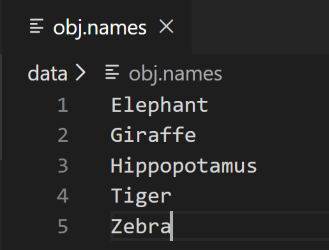

**obj.data** contains the number of classes and the path to the train.txt, test.txt, obj.names files and to the model save folder

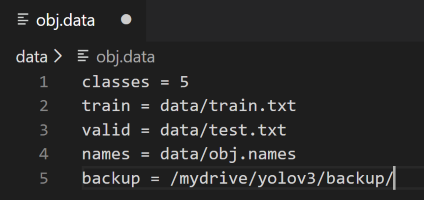



## Cfg File
Edit yolov3_custom.cfg from a copy ofyolov3.cfg.

Now you need to edit the .cfg to fit your needs based on your object detector. Open it up in a code or text editor to do so.

In your custom cfg file, edit for training:
- **batch = 64**
- **subdivisions = 16**
- **max_batches = 10000**
- **steps = 8000, 9000** (**steps** = 80% and 90% of **max_batches**)
- in YOLO layers:
  - **classes=** number of classes
- in convolution layers:
  - **filters =** (5 + number of classes) x 3

You can edit **random = 0** in the three YOLO layers in order to speed up learning but accuracy will be less good

In [3]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'Colab Notebooks'  'Document sans titre.gdoc'  'Ireland&Around'   yolov3


In [4]:
# unzip the zip file and its contents should now be in /darknet/data/obj/
!unzip /mydrive/yolov3/original/darknet.zip -d /content/

Archive:  /mydrive/yolov3/original/darknet.zip
   creating: /content/darknet/
  inflating: /content/__MACOSX/._darknet  
  inflating: /content/darknet/net_cam_v4.sh  
  inflating: /content/__MACOSX/darknet/._net_cam_v4.sh  
  inflating: /content/darknet/video_yolov3.sh  
  inflating: /content/__MACOSX/darknet/._video_yolov3.sh  
  inflating: /content/darknet/CMakeLists.txt  
  inflating: /content/__MACOSX/darknet/._CMakeLists.txt  
  inflating: /content/darknet/LICENSE  
  inflating: /content/__MACOSX/darknet/._LICENSE  
   creating: /content/darknet/cmake/
  inflating: /content/__MACOSX/darknet/._cmake  
  inflating: /content/darknet/image_yolov4.sh  
  inflating: /content/__MACOSX/darknet/._image_yolov4.sh  
  inflating: /content/darknet/Makefile  
  inflating: /content/__MACOSX/darknet/._Makefile  
   creating: /content/darknet/include/
  inflating: /content/__MACOSX/darknet/._include  
  inflating: /content/darknet/DarknetConfig.cmake.in  
  inflating: /content/__MACOSX/darknet/._D

In [5]:
# change makefile to have GPU and OPENCV enabled
%cd /content/darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [6]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [7]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [8]:
# define helper functions
def imShow(path):
    import cv2
    import matplotlib.pyplot as plt
    %matplotlib inline

    image = cv2.imread(path)
    height, width = image.shape[:2]
    resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

    fig = plt.gcf()
    fig.set_size_inches(18, 10)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    plt.show()

# use this to upload files
# not use here
def upload():
    from google.colab import files
    uploaded = files.upload() 
    for name, data in uploaded.items():
        with open(name, 'wb') as f:
        f.write(data)
        print ('saved file', name)

# use this to download a file  
def download(path):
    from google.colab import files
    files.download(path)

In [9]:
# Import train.txt and test.txt generators
!cp /mydrive/yolov3/original/generate_train.py ./

In [10]:
# Create empty obj folder
%mkdir /content/darknet/data/obj/

# Unzip train images in /data/obj folder
!unzip /mydrive/yolov3/obj_train.zip -d /content/darknet/data/obj/

# Generate train.txt
!python generate_train.py

Archive:  /mydrive/yolov3/obj_train.zip
  inflating: /content/darknet/data/obj/0a4924e350c030cc.jpg  
  inflating: /content/darknet/data/obj/__MACOSX/._0a4924e350c030cc.jpg  
  inflating: /content/darknet/data/obj/0a4924e350c030cc.txt  
  inflating: /content/darknet/data/obj/__MACOSX/._0a4924e350c030cc.txt  
  inflating: /content/darknet/data/obj/0aabcf5f5332b8a7.jpg  
  inflating: /content/darknet/data/obj/__MACOSX/._0aabcf5f5332b8a7.jpg  
  inflating: /content/darknet/data/obj/0aabcf5f5332b8a7.txt  
  inflating: /content/darknet/data/obj/__MACOSX/._0aabcf5f5332b8a7.txt  
  inflating: /content/darknet/data/obj/0b3cdf31efceb53b.jpg  
  inflating: /content/darknet/data/obj/__MACOSX/._0b3cdf31efceb53b.jpg  
  inflating: /content/darknet/data/obj/0b3cdf31efceb53b.txt  
  inflating: /content/darknet/data/obj/__MACOSX/._0b3cdf31efceb53b.txt  
  inflating: /content/darknet/data/obj/0b4bc5ff2ff49ae5.jpg  
  inflating: /content/darknet/data/obj/__MACOSX/._0b4bc5ff2ff49ae5.jpg  
  inflating: /c

In [12]:
# Copy yolov3_custom.cfg from Google Drive
!cp /mydrive/yolov3/original/yolov3_custom.cfg /content/darknet/cfg/

# Copy the obj.names and obj.data files from Google Drive
!cp /mydrive/yolov3/original/obj.names /content/darknet/data
!cp /mydrive/yolov3/original/obj.data  /content/darknet/data


**train.txt** has to look like the following picture

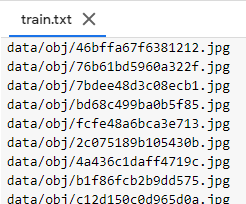


In [ ]:
# Display number of pictures for training
path, dirs, files = next(os.walk("/content/darknet/data/obj"))
print('Number of pictures for training: {}'.format(int(len(files)/2)))

In [ ]:
# This stops 'Run all' at this cell by causing an error
assert False

## Last check before training
- obj.names
- obj.data
- yolov3_custom.cfg
- train.txt

# Train Your Custom Object Detector!!!

In [ ]:
# need to set our custom cfg to train mode 
%cd /content/darknet/cfg/
!sed -i 's/batch=1/batch=64/' yolov3_custom.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' yolov3_custom.cfg

/content/darknet/cfg
/content/darknet


In [ ]:
# Change directory
%cd /content/darknet/

# Train model
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup_weights/yolov3_custom_last.weights -dont_show

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
Couldn't open file: map


In [ ]:
imShow('chart.png')

In [ ]:
# This stops 'Run all' at this cell by causing an error
assert False

# Run Your Custom Object Detector!!!

In [ ]:
# need to set our custom cfg to test mode 
%cd /content/darknet/cfg/
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg

/content/darknet/cfg
/content/darknet


In [ ]:
# Change directory
%cd /content/darknet/

# Test model on picture
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup_weights/yolov3_custom_last.weights /mydrive/yolov3/test_images/image09.jpeg -thresh 0.5

# Show prediction
imShow('predictions.jpg')

# Download prediction
download('predictions.jpg')